From here onwards i will copy the previous code ..

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle1.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.zip -d /content/data

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: /content/data/img_align_celeba/img_align_celeba/

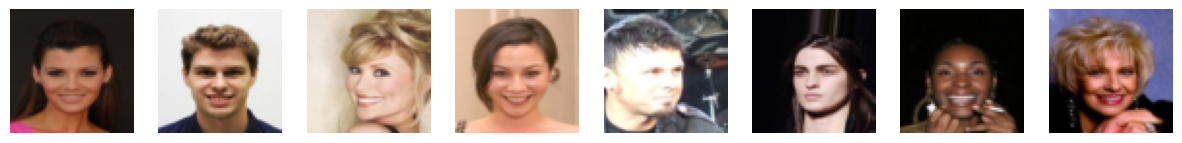

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/kaggle1.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d jessicali9530/celeba-dataset
!unzip celeba-dataset.zip -d /content/data

import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Path to the extracted dataset
DATASET_PATH = "/content/data/img_align_celeba"

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1,1]
])

# Load the dataset
dataset = ImageFolder(root=DATASET_PATH, transform=transform)

# Create DataLoader
batch_size = 128
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=8)

# Check a batch of images
def show_images(images, num=8):
    images = images[:num]  # Select first 'num' images
    images = images.permute(0, 2, 3, 1).numpy()  # Convert to (H, W, C)
    images = (images + 1) / 2  # De-normalize from [-1,1] to [0,1]

    fig, axes = plt.subplots(1, num, figsize=(15, 5))
    for i in range(num):
        axes[i].imshow(images[i])
        axes[i].axis("off")
    plt.show()

# Get a batch of images and visualize them
dataiter = iter(dataloader)
images, _ = next(dataiter)
show_images(images)


Resuming training from epoch 32
Epoch 32/50 Loss D: 0.1529917058069259 Loss G: 6.562585353851318


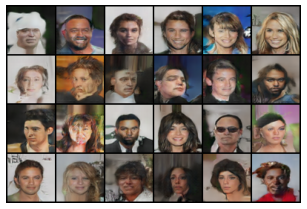

Epoch 33/50 Loss D: 0.07219872437417507 Loss G: 5.832309722900391


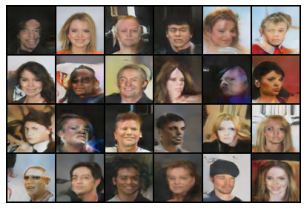

Epoch 34/50 Loss D: 1.9621050499845296 Loss G: 17.414480209350586


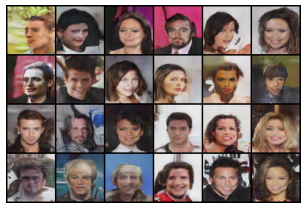

Epoch 35/50 Loss D: 0.0742008164525032 Loss G: 6.96757698059082


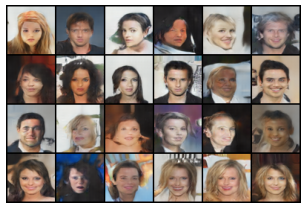

Epoch 36/50 Loss D: 0.10652785189449787 Loss G: 6.513680934906006


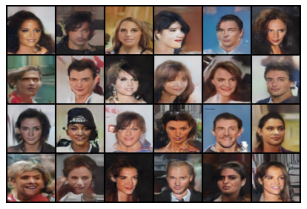

Epoch 37/50 Loss D: 0.03913277946412563 Loss G: 6.023293972015381


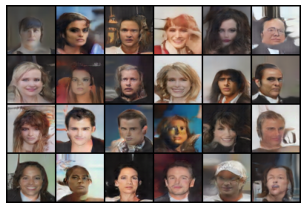

Epoch 38/50 Loss D: 0.04757539927959442 Loss G: 6.863559246063232


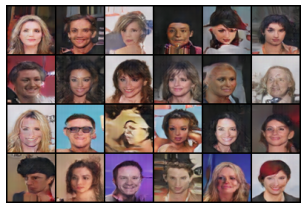

Epoch 39/50 Loss D: 0.04783124104142189 Loss G: 6.765068054199219


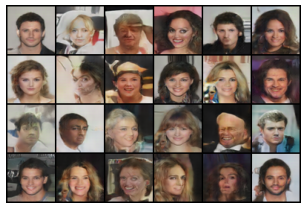

Epoch 40/50 Loss D: 0.038812555372714996 Loss G: 7.05013370513916


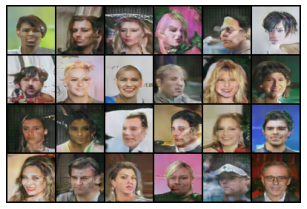

Epoch 41/50 Loss D: 0.10998277040198445 Loss G: 8.122907638549805


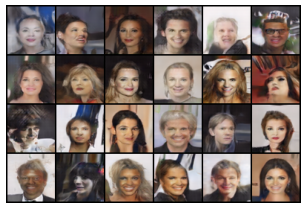

Epoch 42/50 Loss D: 0.5878931879997253 Loss G: 4.3585896492004395


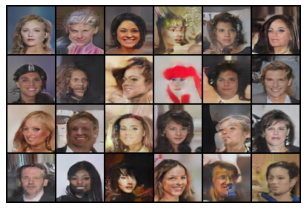

Epoch 43/50 Loss D: 0.05775274522602558 Loss G: 5.713210582733154


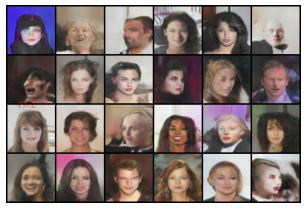

Epoch 44/50 Loss D: 0.011220525950193405 Loss G: 6.885581016540527


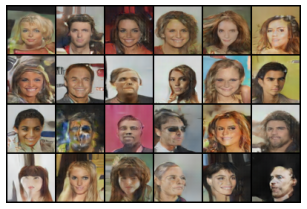

Epoch 45/50 Loss D: 0.05882038362324238 Loss G: 4.920550346374512


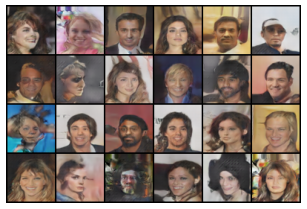

Epoch 46/50 Loss D: 0.058351125568151474 Loss G: 7.341678619384766


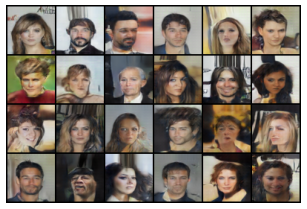

Epoch 47/50 Loss D: 0.0659120932687074 Loss G: 7.278393745422363


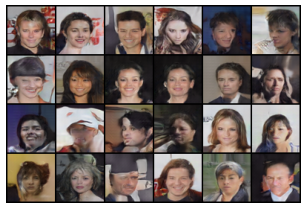

Epoch 48/50 Loss D: 0.04579457454383373 Loss G: 5.745678424835205


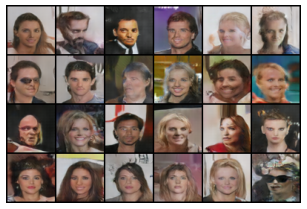

Epoch 49/50 Loss D: 0.023419312201440334 Loss G: 6.392053127288818


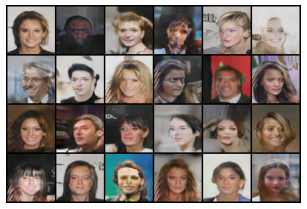

Epoch 50/50 Loss D: 5.87966987733671 Loss G: 0.1608542650938034


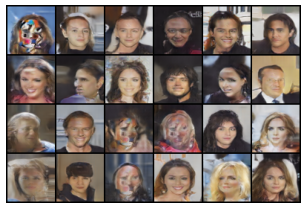

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import os
import matplotlib.pyplot as plt

# Hyperparameters
nz = 100  # Latent vector size
ngf = 64  # Generator feature maps
ndf = 64  # Discriminator feature maps
nc = 3    # Number of channels (RGB)

checkpoint_path = "/content/drive/MyDrive/DCGAN_CelebA_New/checkpoints/checkpoint.pth"


# Generator model
def Generator(nz, ngf, nc):
    return nn.Sequential(
        nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False),
        nn.BatchNorm2d(ngf * 8),
        nn.ReLU(True),
        nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 4),
        nn.ReLU(True),
        nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf * 2),
        nn.ReLU(True),
        nn.ConvTranspose2d(ngf * 2, ngf, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ngf),
        nn.ReLU(True),
        nn.ConvTranspose2d(ngf, nc, 4, 2, 1, bias=False),
        nn.Tanh()
    )

# Discriminator model
def Discriminator(nc, ndf):
    return nn.Sequential(
        nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 2),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 4),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 8),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
        nn.Sigmoid()
    )

# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = Generator(nz, ngf, nc).to(device)
D = Discriminator(nc, ndf).to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optimizerG = optim.Adam(G.parameters(), lr=0.002, betas=(0.5, 0.999))
optimizerD = optim.Adam(D.parameters(), lr=0.002, betas=(0.5, 0.999))

# Load checkpoint if available
start_epoch = 0
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    G.load_state_dict(checkpoint['G_state_dict'])
    D.load_state_dict(checkpoint['D_state_dict'])
    optimizerG.load_state_dict(checkpoint['optimizerG_state_dict'])
    optimizerD.load_state_dict(checkpoint['optimizerD_state_dict'])
    start_epoch = checkpoint['epoch']
    print(f"Resuming training from epoch {start_epoch+1}")

# Training loop
num_epochs = 50
for epoch in range(start_epoch, num_epochs):
    for i, (real_images, _) in enumerate(dataloader):
        # Train Discriminator
        D.zero_grad()
        real_images = real_images.to(device)
        b_size = real_images.size(0)
        real_labels = torch.ones(b_size, 1, device=device)
        fake_labels = torch.zeros(b_size, 1, device=device)

        output = D(real_images).view(-1, 1)
        lossD_real = criterion(output, real_labels)
        lossD_real.backward()

        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake_images = G(noise)
        output = D(fake_images.detach()).view(-1, 1)
        lossD_fake = criterion(output, fake_labels)
        lossD_fake.backward()
        optimizerD.step()

        # Train Generator
        G.zero_grad()
        output = D(fake_images).view(-1, 1)
        lossG = criterion(output, real_labels)
        lossG.backward()
        optimizerG.step()

    print(f"Epoch {epoch+1}/{num_epochs} Loss D: {lossD_real.item() + lossD_fake.item()} Loss G: {lossG.item()}")

    # Save generated images for visualization
    vutils.save_image(fake_images, f"fake_samples_epoch_{epoch+1}.png", normalize=True)
    # plt.figure(figsize=(5,5))
    # plt.imshow(fake_images[0].cpu().detach().permute(1,2,0).numpy() * 0.5 + 0.5)
    # plt.axis("off")
    # plt.show()


    num_images = 24

    # Select the first 24 images from fake_images
    grid_images = fake_images[:num_images]

    # Create a grid with 6 images per row (yielding 4 rows)
    grid = vutils.make_grid(grid_images, nrow=6, normalize=True)

    # If each image is 64x64, the overall grid will be 384x256 pixels.
    # With a DPI of 64, we set the figure size to (384/64, 256/64) = (6, 4) inches.
    plt.figure(figsize=(6, 4), dpi=64)
    plt.imshow(grid.permute(1, 2, 0).cpu().detach().numpy())
    plt.axis("off")
    plt.show()

    # Save model checkpoint
    torch.save({
        'epoch': epoch,
        'G_state_dict': G.state_dict(),
        'D_state_dict': D.state_dict(),
        'optimizerG_state_dict': optimizerG.state_dict(),
        'optimizerD_state_dict': optimizerD.state_dict()
    }, checkpoint_path)
